<a href="https://colab.research.google.com/github/lorenzotomada/Applied_Mathematics/blob/main/Code/AM_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Non-linear equations: fixed point method**

In [26]:
%matplotlib inline
%pylab inline
from numpy import *
from matplotlib.pyplot import *
import math

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


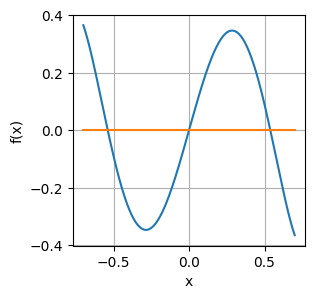

In [27]:
f = lambda x : x/8 * (63*x**4-70*x**2 +15)
n = 1000
a = -0.7
b = 0.7 # in this interval the hypoth. of the convergence theorem are satisfied

# Changing the definition of phi (see below) suggests us to change the interval [a, b] in order to only work where we
# know that the derivative of phi is smaller than 1 in absolute value

# case1: (0.4 0.7)
# case2: (0.75 0.95)
# case3: (-0.25 0.25)
# case4: (-0.7 0.7)

eps = 1e-10
n_max = 1000
#x0 = 0.3

x = linspace(a, b, n)
c = zeros_like(x) # To build a vector of zeros of the same size of x
figsize(3,3)
plot(x, f(x))
plot(x, c)
xlabel('x')
ylabel('f(x)')
grid()

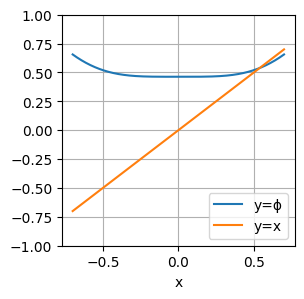

In [28]:
#phi = lambda x : 63./70.*x**3 + 15./(70.*x) #case1. # Now phi has two intersections. In [-0.7, 0.7] not true that abs(phi') < 1
#phi = lambda x : 70.0/(63.*x) - 15/(63*x**3) #case2
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5 #case3
phi = lambda x : sqrt((63.*x**4 + 15.0)/70.) #case4
plot(x, phi(x), label='y=ϕ')
xlabel('x')
plot(x, x, label='y=x')
ylim(-1,1)
legend()
grid()

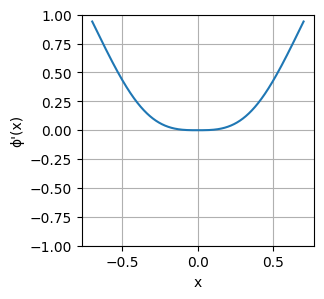

In [29]:
#phi_prime = lambda x : 63./70.*3*x**2 - 15./(70.*x**2) #case1
#phi_prime = lambda x : -70./(63*x**2) + 15.*3./(63.*x**4) #case2
#phi_prime = lambda x : 70./15.0*3*x**2 - 63.0/15.0*5*x**4 #case3
phi_prime = lambda x : 1.0/(2.0*sqrt((63.*x**4 + 15.0)/70.))*(63.*4*x**3/70.) #case4

plot(x,abs(phi_prime(x)))
xlabel('x')
ylabel('ϕ\'(x)')
ylim(-1,1)
grid()

The number of iterations needed is 32
The value of the root is 0.5384693100128499
Error = 8.503941995030573e-11
CPU times: user 23.9 ms, sys: 0 ns, total: 23.9 ms
Wall time: 24.9 ms


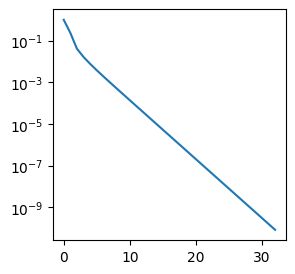

In [30]:
def fixed_point(phi, x0, eps=1e-10, n_max=1000):
  x = x0
  err = 1.
  errors = [err]
  it = 0
  while (err > eps and it < n_max):
    x_new = phi(x)
    err = abs(x - x_new)
    x = x_new
    it +=1
    errors.append(err)
  semilogy(errors)
  print("The number of iterations needed is", it)
  print("The value of the root is", x)
  print('Error =', err)
  return (errors, x)

%time errors_fixed, x_fixed = fixed_point(phi,0.23)

This is actually the same result of a function which is already implemented in Scipy. Let us compare that implementation with ours.

In [31]:
import scipy.optimize as opt
opt.fixed_point(phi, 0.6, xtol=1e-10, maxiter = 1000)

array(0.53846931)

This code is probably more optimized, but the result is the same.
You switch to the other definitions of $\phi$ (commenting and uncommenting the respective lines) to see what happens. Adjust a and b according to the absolute value of the derivative!

In lab4.ipynb there is a plot comparing the different methods which have been used. We can observe that the Newton method reaches a higher accuracy with fewer iterations with respect to the others.

#**Least squares**

The following is an example from Lecture 06.

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

The coefficients are 501596.6994081075 -549.8998019168754 0.1513877128805333
4745.087199664209
6051.288176908856
8521.523173747235


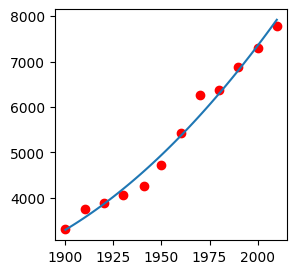

In [32]:
year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

assert len(year) is len(population)
n = len(year) # = len(population)
B = matrix([ones(n), year, year**2]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y) # to solve

# We want the coefficients:
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
print('The coefficients are', a0, a1, a2)

xx = linspace(1900,2010,100) # Between the years we have in the table
f = lambda x: a0 + a1*x + a2*x**2 # This is the desired polynomial

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')

print(f(1945))
print(f(1975))
print(f(2020))

Now we do it changing the degree for the polyomial fitting (using $n = 3$):

The coefficients are 26802353.274437316 -40923.77128624008 20.806645395172925 -0.0035217535289880923
4673.021194063127
6172.457116425037
8041.685336280614


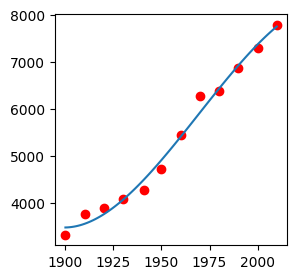

In [33]:
B2 = matrix([ones(n), year, year**2, year**3]).T # Just add a column to B
B2T = B2.T

aa = linalg.solve(B2T*B2, B2T*y) # to solve

# We want the coefficients:
b0 = float(aa[0])
b1 = float(aa[1])
b2 = float(aa[2])
b3 = float(aa[3])
print('The coefficients are', b0, b1, b2, b3)

g = lambda x: b0 + b1*x + b2*x**2 + b3*x**3 # This is the desired polynomial

plot(xx, g(xx))
scatter(year, population, color='r')

print(g(1945))
print(g(1975))
print(g(2020))

Now with order $1$:

The coefficients are -76819.30809749143 42.02023345850122
4910.045979293427
6170.652983048465
8061.563488681029


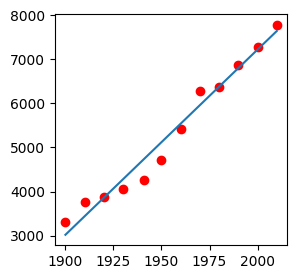

In [34]:
B3 = matrix([ones(n), year]).T
B3T = B3.T

aaa = linalg.solve(B3T*B3, B3T*y)

c0 = float(aaa[0])
c1 = float(aaa[1])
print('The coefficients are', c0, c1)

h = lambda x: c0 + c1*x

plot(xx, h(xx))
scatter(year, population, color='r')

print(h(1945))
print(h(1975))
print(h(2020))

Now we do the same using _polyfit_ which is the numpy polyomial fitting tool.

Coefficients: [-3.52181888e-03  2.08070287e+01 -4.09245205e+04  2.68028413e+07]


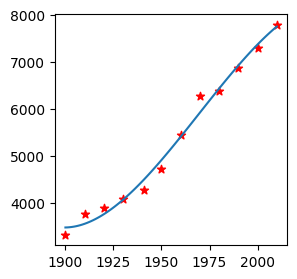

In [41]:
desired_degree = 3
a = polyfit(year, population, desired_degree) # pass the data and then the desired degree
print('Coefficients:', a)
f = poly1d(a)
plot(xx, f(xx))
scatter(year, population, color = 'r', marker = '*')